In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Inserting bias term
        z = np.dot(self.weights, x)
        return self.activation_fn(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights = self.weights + self.lr * error * np.insert(X[i], 0, 1)


In [3]:
# OR function dataset
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])


In [4]:
# AND function dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

In [5]:
# Create Perceptron instances for OR and AND functions
perceptron_or = Perceptron(2)
perceptron_and = Perceptron(2)

In [6]:
# Train Perceptrons
perceptron_or.train(X_or, y_or)
perceptron_and.train(X_and, y_and)


In [7]:
# Test OR and AND functions
print("OR:")
for i in range(X_or.shape[0]):
    y = perceptron_or.predict(X_or[i])
    print(f"{X_or[i]}: {y}")

print("\nAND:")
for i in range(X_and.shape[0]):
    y = perceptron_and.predict(X_and[i])
    print(f"{X_and[i]}: {y}")

OR:
[0 0]: 0
[0 1]: 1
[1 0]: 1
[1 1]: 1

AND:
[0 0]: 0
[0 1]: 0
[1 0]: 0
[1 1]: 1


**Single-Layer Perceptron - Binary Classifier-Pima Indians Diabetes Database**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap


In [9]:
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Inserting bias term
        z = np.dot(self.weights, x)
        return self.activation_fn(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights = self.weights + self.lr * error * np.insert(X[i], 0, 1)


In [10]:
diabetes_data = pd.read_csv('/content/diabetes.csv')


In [11]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [27]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
diabetes_data.shape

(768, 9)

In [30]:
corr=diabetes_data.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

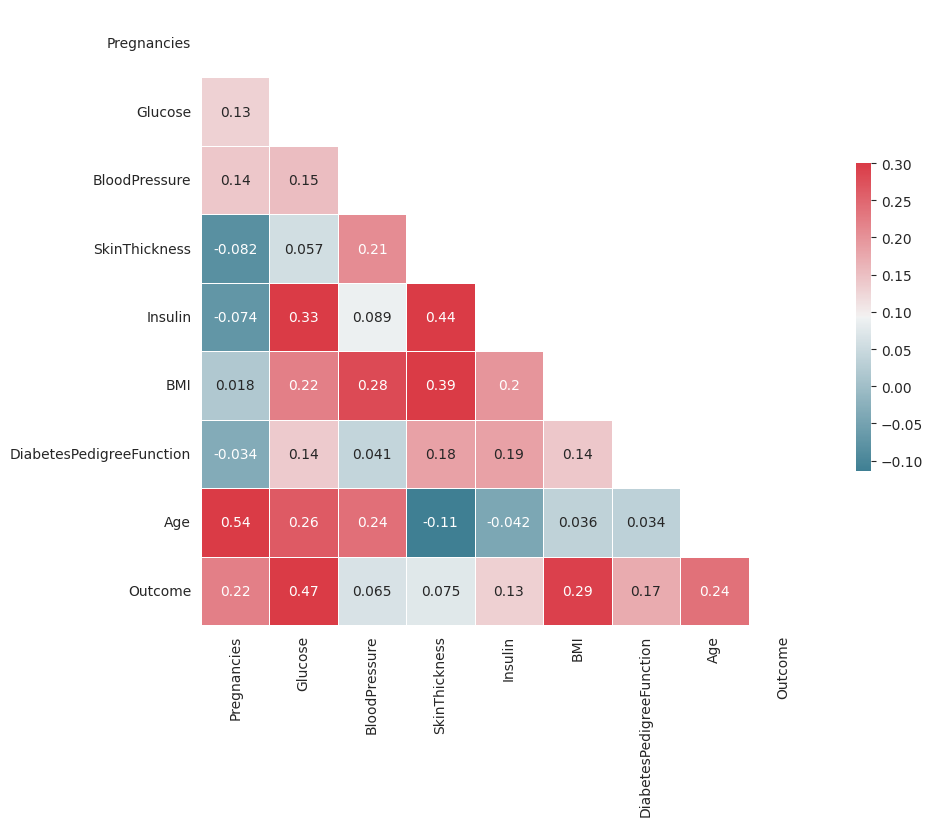

In [38]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

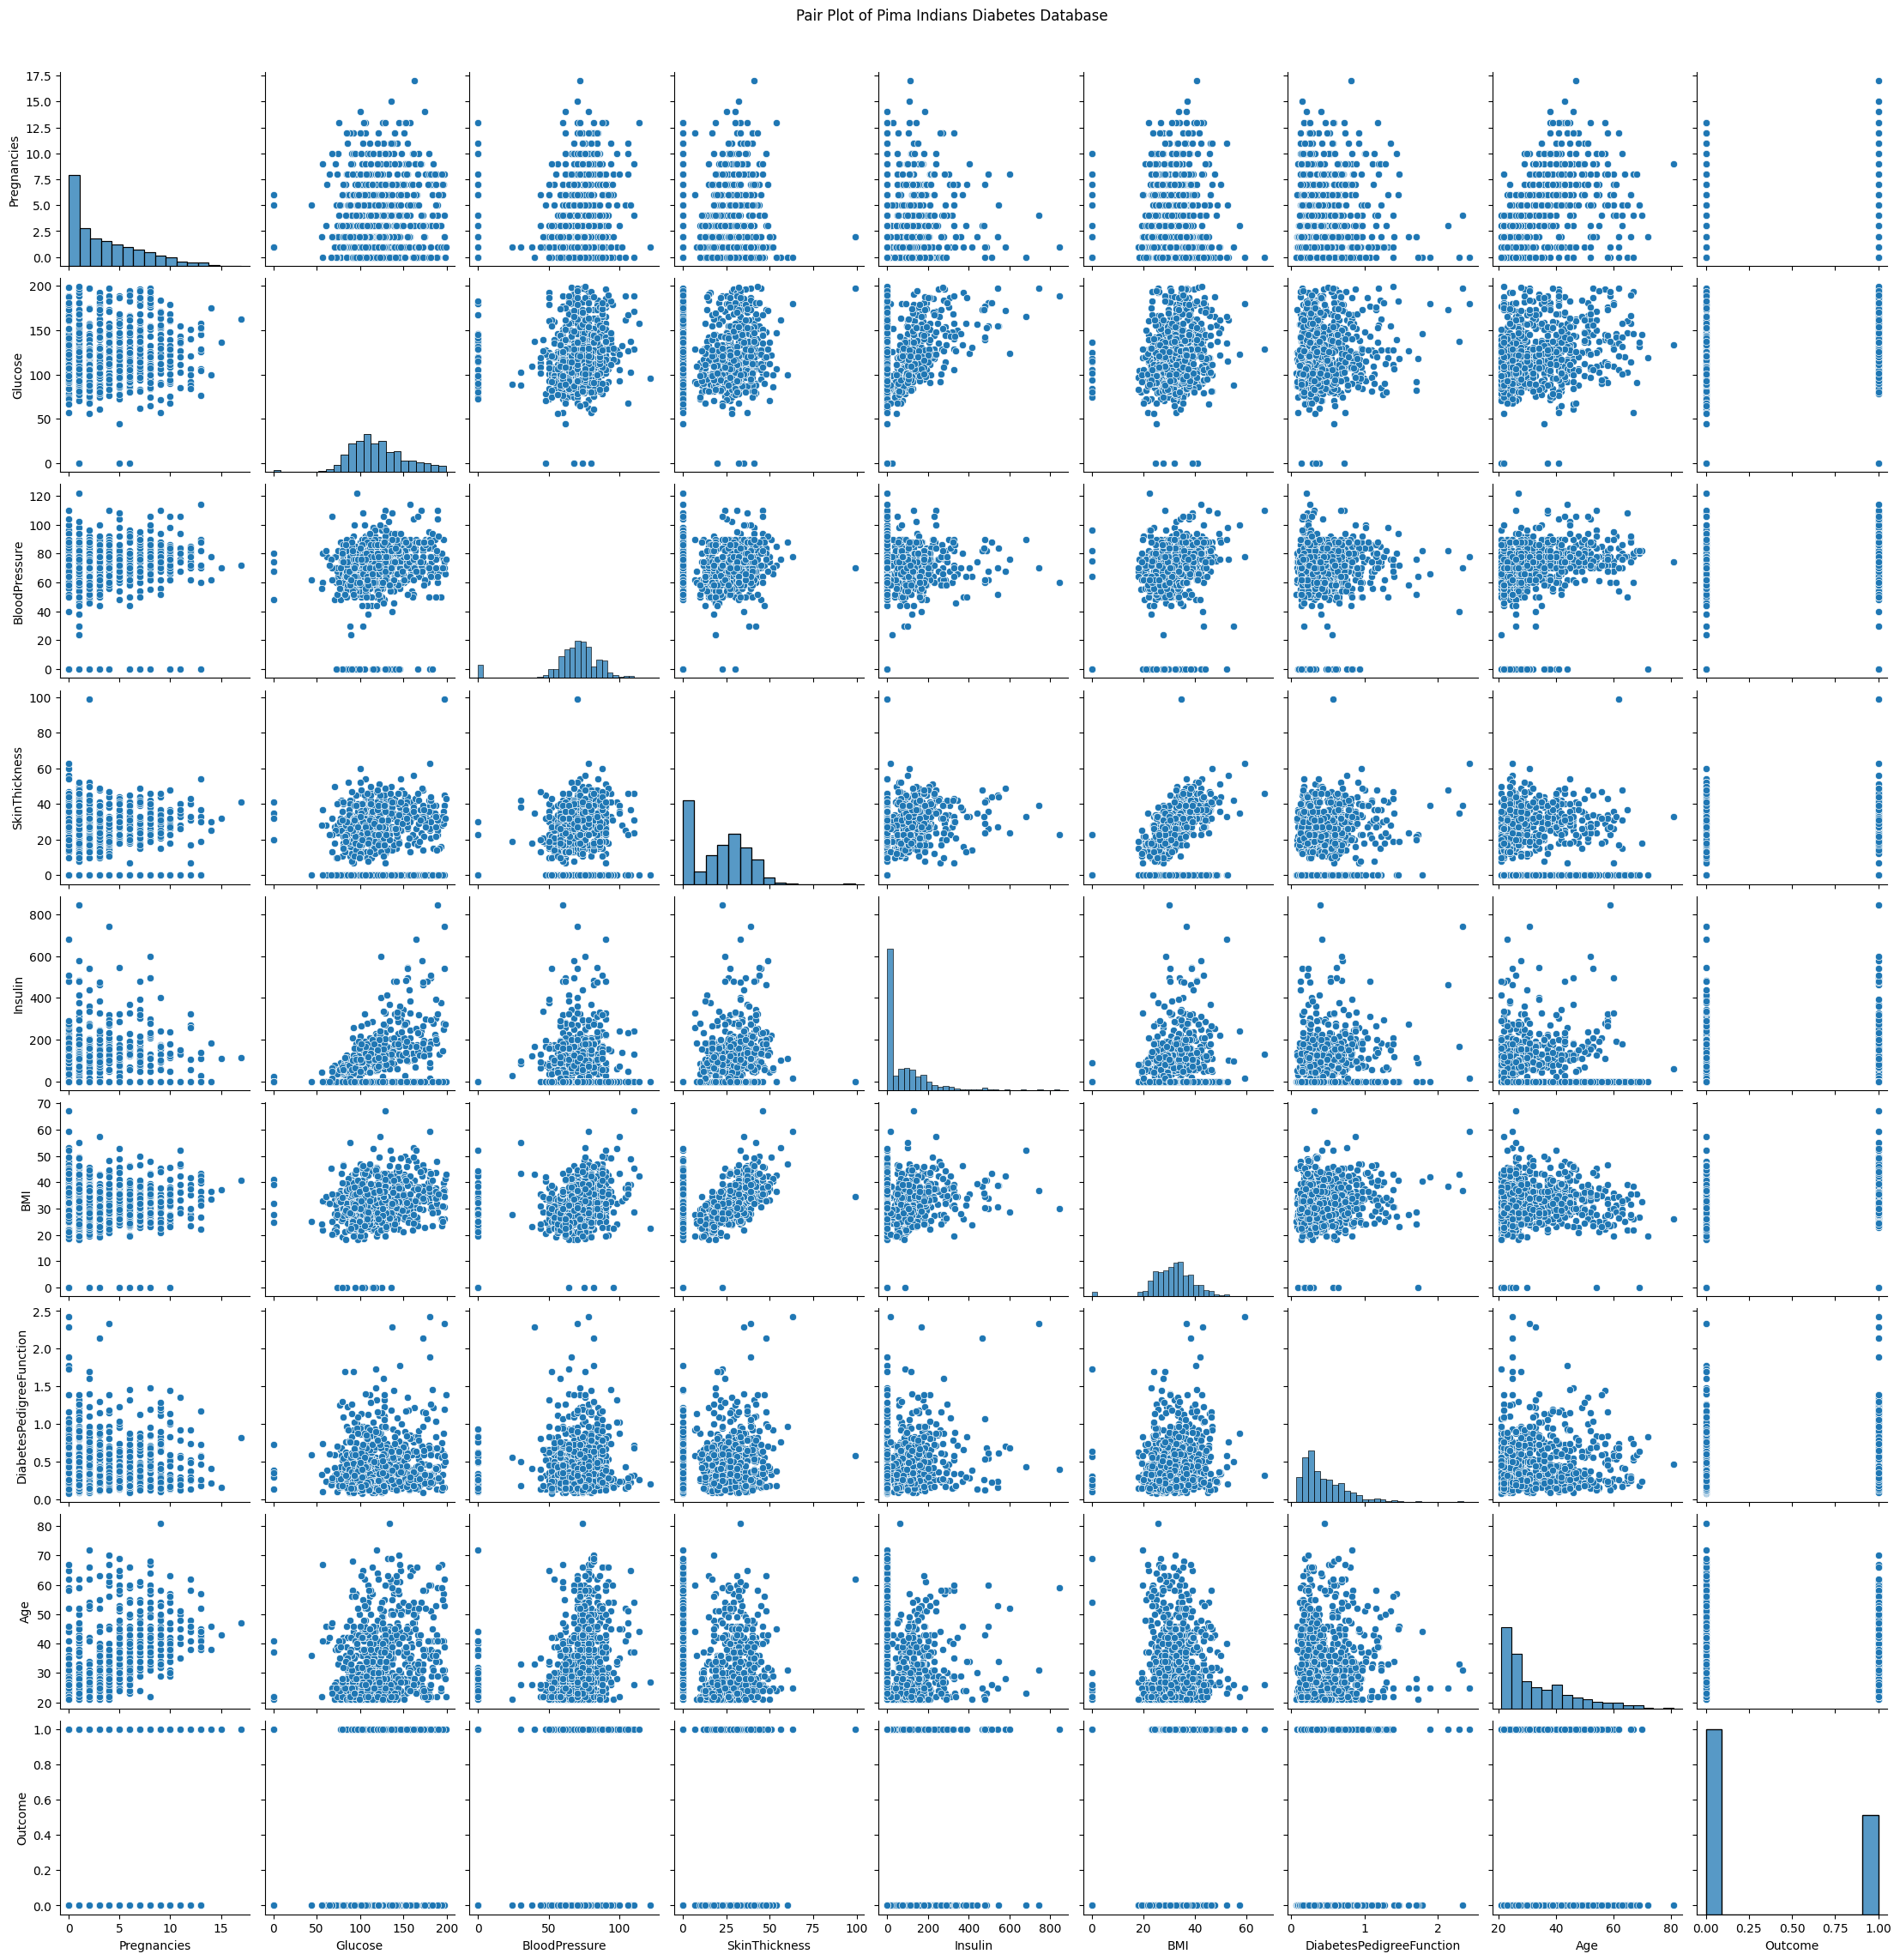

In [43]:
sns.pairplot(diabetes_data)
plt.suptitle('Pair Plot of Pima Indians Diabetes Database', y=1.02)
plt.show()

In [40]:
)

SyntaxError: unmatched ')' (<ipython-input-40-a35077a93b18>, line 1)

In [12]:
# Separate features and target variable
X = diabetes_data.drop('Outcome', axis=1).values
y = diabetes_data['Outcome'].values

In [13]:
# Normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Create and train the Perceptron
perceptron = Perceptron(input_size=X.shape[1])
perceptron.train(X_train, y_train)


In [16]:
# Make predictions on the test set
y_pred = [perceptron.predict(x) for x in X_test]


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7445887445887446


**Multi-Layer Perceptron for Multi-class Classification (using Wine Quality dataset)**

In [18]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [19]:
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01, epochs=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        self.epochs = epochs
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        grad_z2 = self.a2 - y
        grad_W2 = (1 / m) * np.dot(self.a1.T, grad_z2)
        grad_b2 = (1 / m) * np.sum(grad_z2, axis=0, keepdims=True)
        grad_a1 = np.dot(grad_z2, self.W2.T)
        grad_z1 = grad_a1 * self.a1 * (1 - self.a1)
        grad_W1 = (1 / m) * np.dot(X.T, grad_z1)
        grad_b1 = (1 / m) * np.sum(grad_z1, axis=0, keepdims=True)

        self.W2 -= self.lr * grad_W2
        self.b2 -= self.lr * grad_b2
        self.W1 -= self.lr * grad_W1
        self.b1 -= self.lr * grad_b1

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)


In [20]:
# Load Wine Quality dataset
wine = pd.read_csv('/content/WineQT.csv')


In [21]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [44]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [45]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [46]:
wine.shape

(1143, 13)

In [47]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [48]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [49]:
corr=wine.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

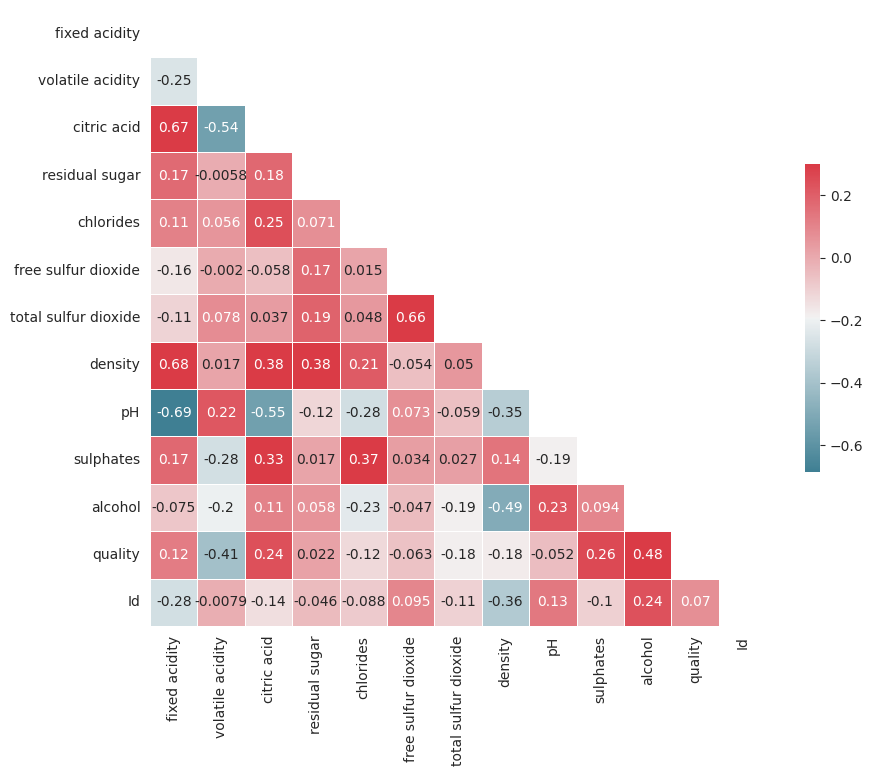

In [50]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<ipython-input-51-3866b2824f1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'])


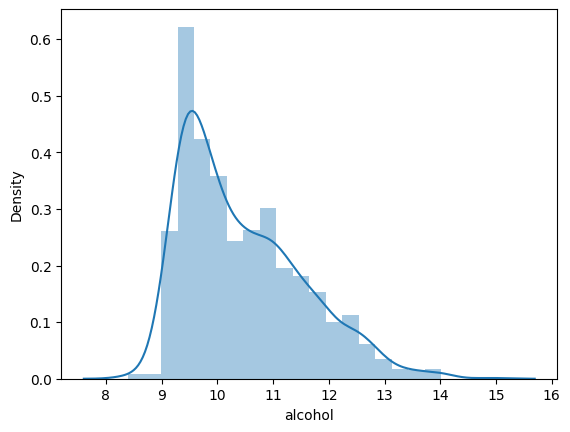

In [51]:
sns.distplot(wine['alcohol'])
plt.show()

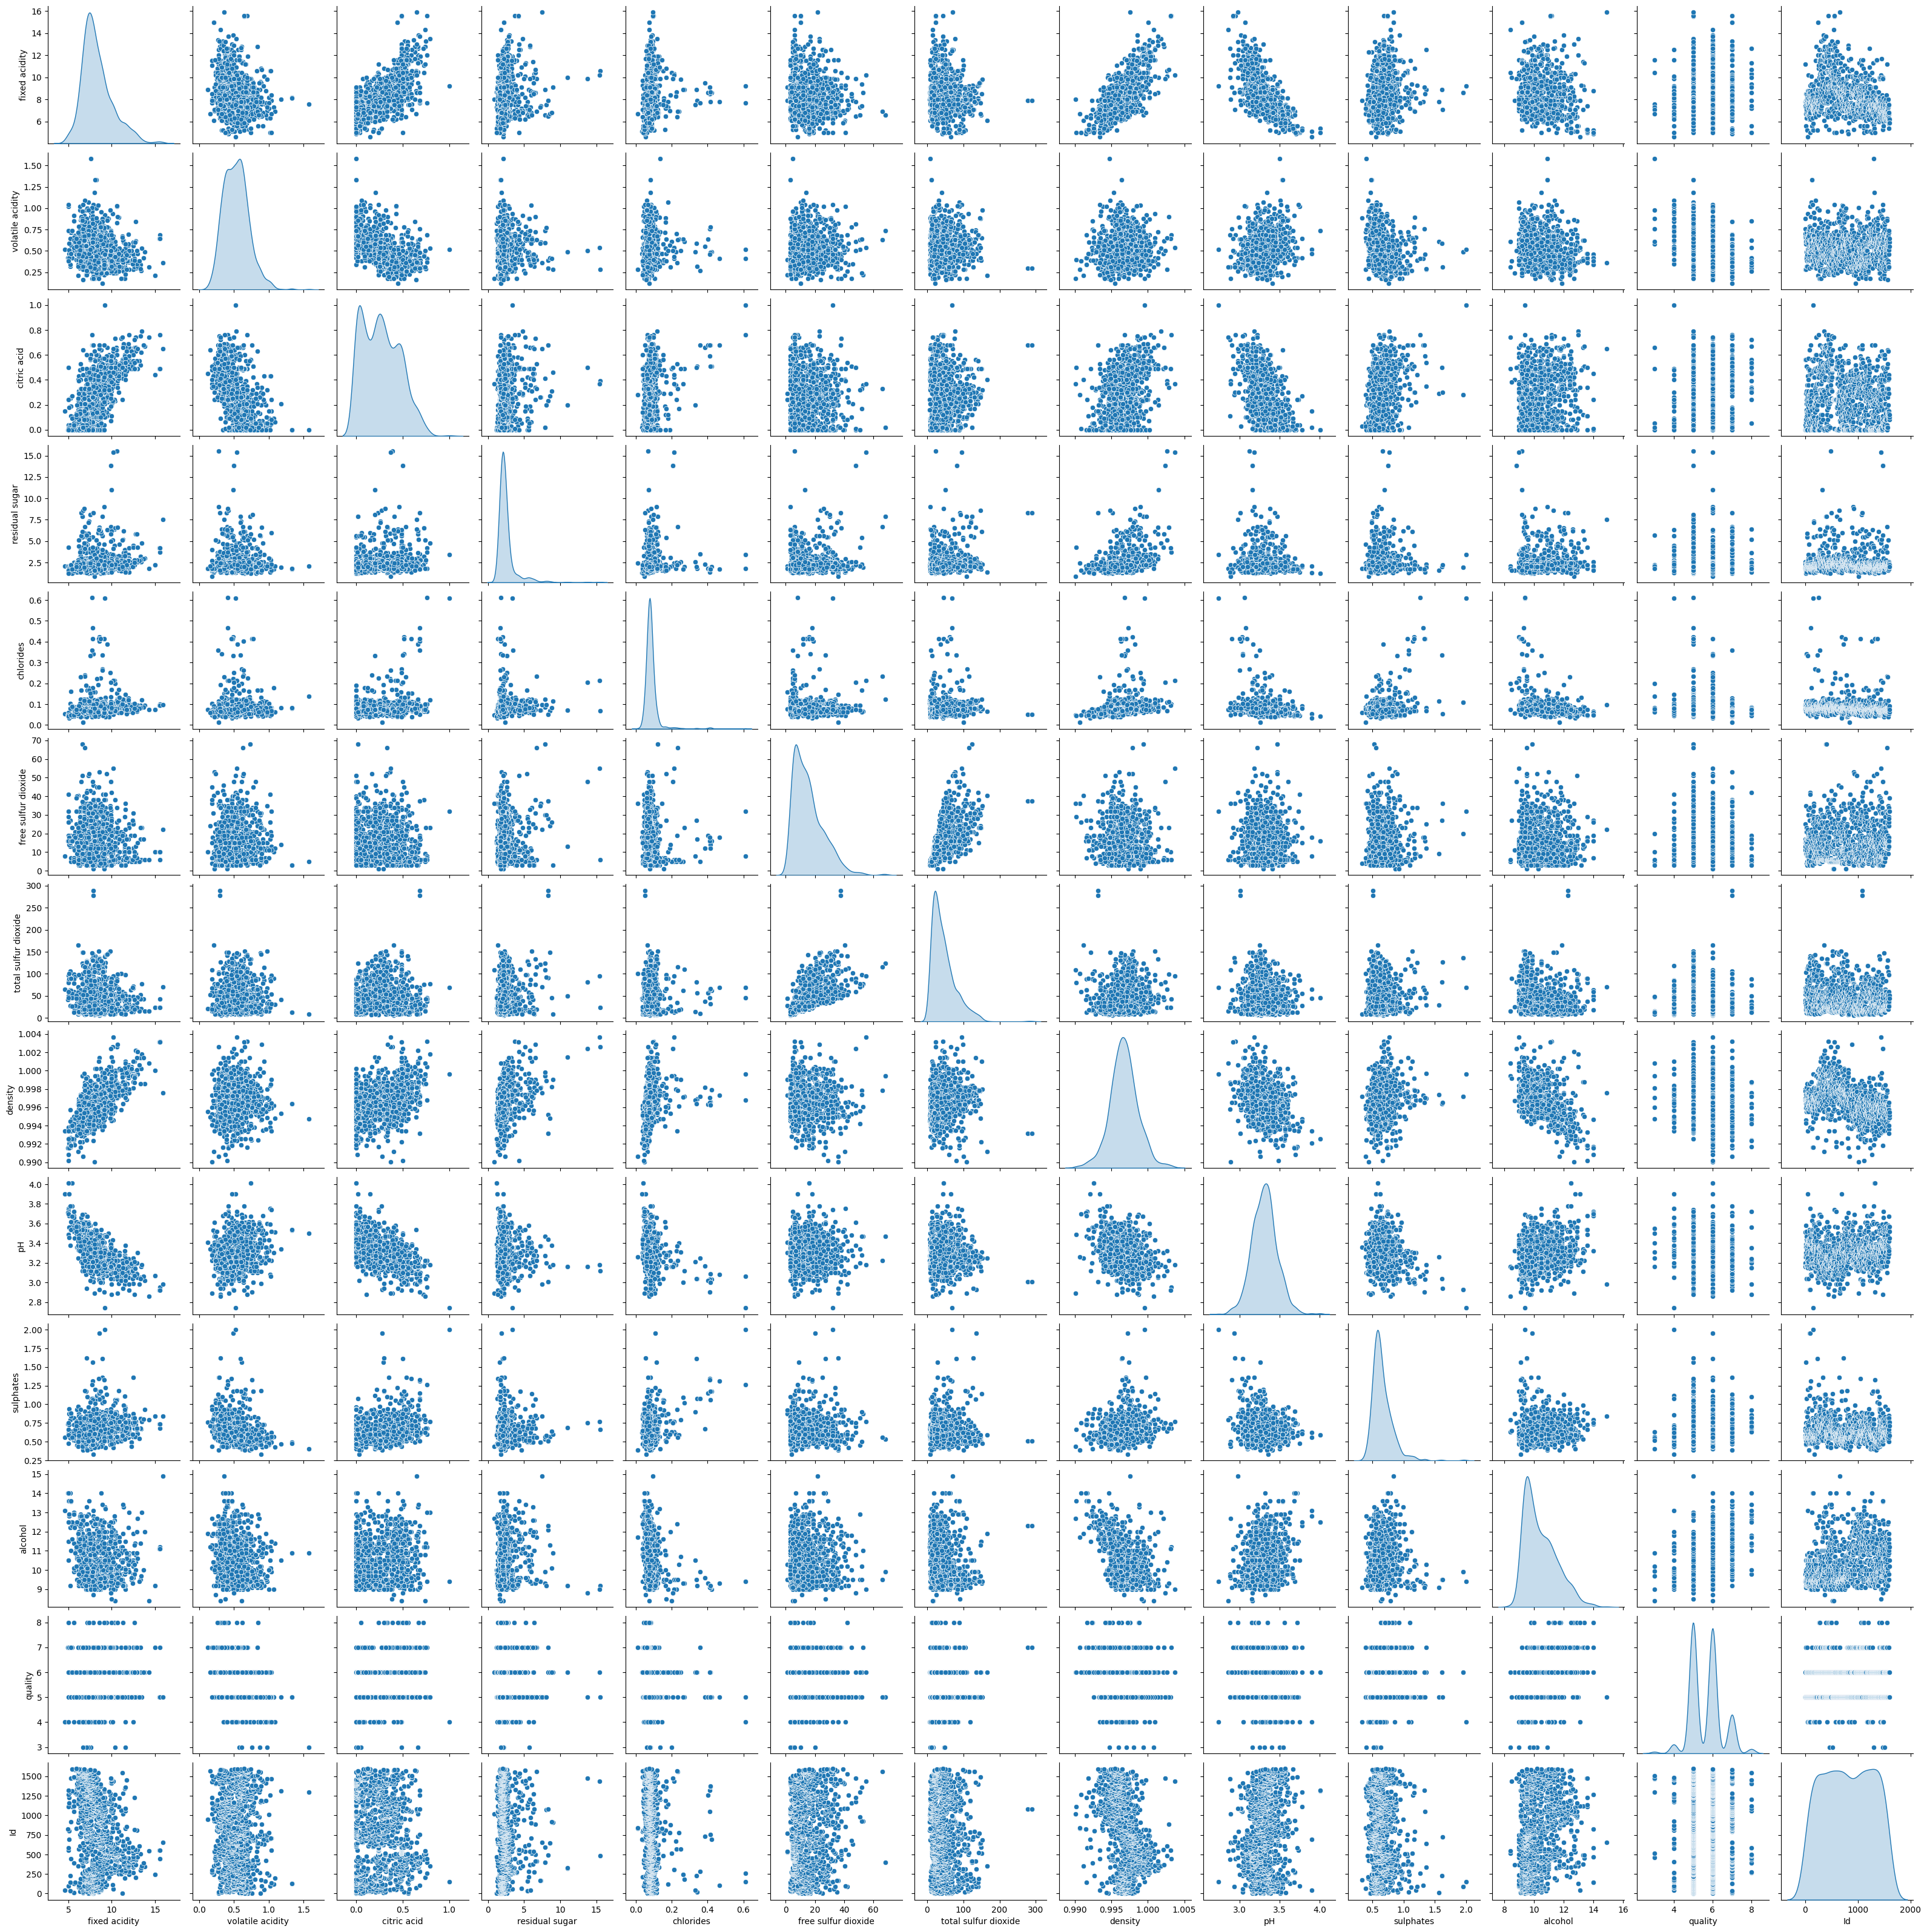

In [57]:
import random
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.neighbors import KNeighborsClassifier # KNN Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB # Naive Bayes Model
from sklearn.metrics import accuracy_score # Accuracy measurements
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
sns.pairplot(wine, palette="husl",diag_kind="kde")
plt.show()

In [22]:
# Normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Initialize and train the multi-layer perceptron
mlp = MultiLayerPerceptron(input_size=X.shape[1], hidden_size=32, output_size=3, lr=0.01, epochs=1000)
mlp.train(X_train, np.eye(3)[y_train])


In [25]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)


In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7186147186147186
